In [5]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [7]:
df = pd.DataFrame()

In [9]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
     

In [11]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

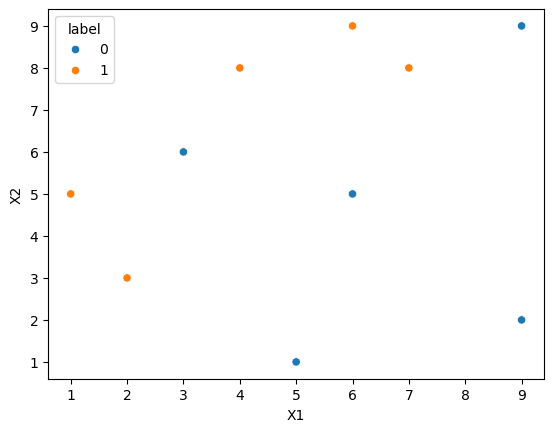

In [19]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [21]:
df['weights'] = 1/df.shape[0]

In [23]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [25]:
from sklearn.tree import DecisionTreeClassifier


In [27]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [29]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [31]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

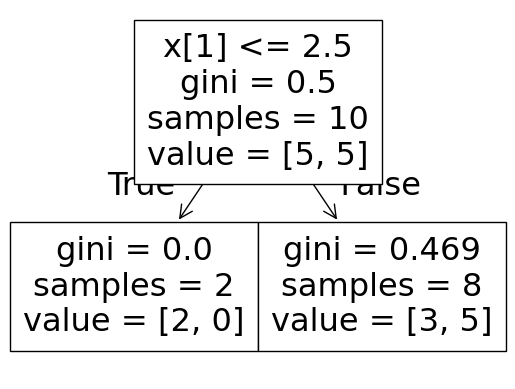

In [33]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

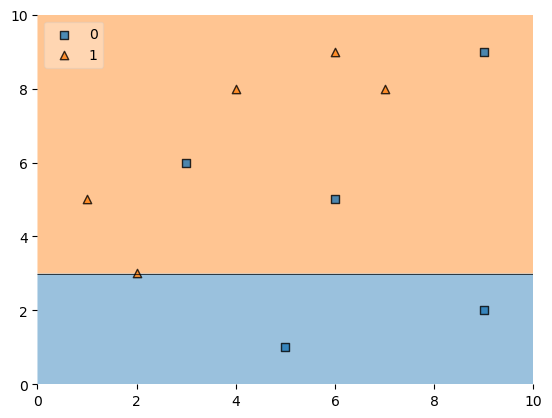

In [35]:
plot_decision_regions(X,y,clf=dt1, legend=2)

In [37]:
df['y_pred'] = dt1.predict(X)

In [39]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [45]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [47]:
#Step-3 calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [55]:
#Update Weights

def updated_row_weights(row, alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [57]:
df['updated_weights']=df.apply(updated_row_weights, axis=1)

In [60]:

df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [62]:
df['updated_weights'].sum()

0.9165153319682015

In [64]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [66]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [68]:
df['normalized_weights'].sum()

1.0

In [72]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [78]:
df['cumsum_lower'] = df['cumsum_upper'] - (df['normalized_weights'])

In [82]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [104]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [106]:
index_values = create_new_dataset(df)

index_values

[6, 0, 7, 2, 6, 6, 2, 0, 6, 5]

In [110]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [112]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
0,1,5,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1


In [114]:
dt2 = DecisionTreeClassifier(max_depth=1)


In [116]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [118]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.625, 0.5, '  False')]

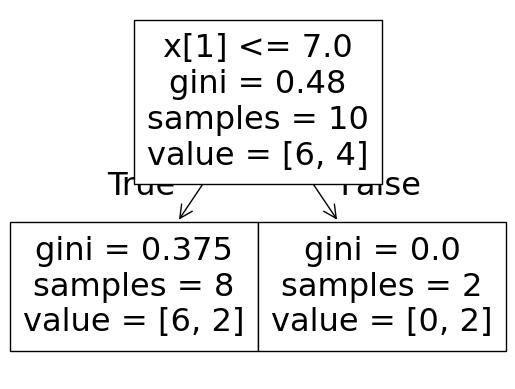

In [120]:
plot_tree(dt2)

<Axes: >

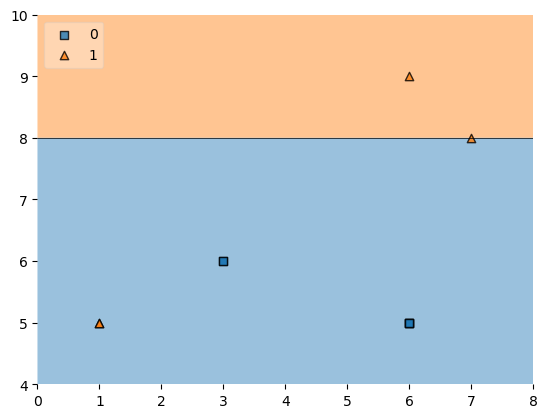

In [124]:
plot_decision_regions(X,y, clf=dt2, legend=2)

In [128]:
second_df['y_pred'] = dt2.predict(X)

In [130]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
0,1,5,1,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,1


In [132]:
alpha2 = calculate_model_weight(0.1)


In [134]:
alpha2

1.0986122886681098

In [136]:
#Step 4 : Update Weights

def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [138]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [140]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
0,1,5,1,0.1,0,0.297427
7,7,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622


In [142]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [144]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
6,6,5,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,0,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,0,0.297427,0.344313
6,6,5,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922


In [146]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [150]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])


In [152]:
 second_df['cumsum_lower'] = np.cumsum(second_df['normalized_weights'])

In [158]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]
     

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.038922,0.038922,0.038922
0,1,5,1,0.1,0,0.344313,0.383235,0.383235
7,7,8,1,0.1,1,0.038922,0.422157,0.422157
2,3,6,0,0.1,0,0.038922,0.461078,0.461078
6,6,5,0,0.1,0,0.038922,0.500000,0.500000
6,6,5,0,0.1,0,0.038922,0.538922,0.538922
2,3,6,0,0.1,0,0.038922,0.577843,0.577843
0,1,5,1,0.1,0,0.344313,0.922157,0.922157
6,6,5,0,0.1,0,0.038922,0.961078,0.961078
5,6,9,1,0.1,1,0.038922,1.000000,1.000000


In [162]:
index_values = create_new_dataset(second_df)

third_df = second_df.iloc[index_values,[0,1,2,3]]



In [164]:
third_df

,X1,X2,label,weights


In [170]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values